<a href="https://colab.research.google.com/github/afk22996/lvlspy/blob/main/kirbyradiativeprocesses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lvlspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
from lvlspy.level import Level
from lvlspy.species import Species
from lvlspy.transition import Transition
import matplotlib.pyplot as plt
from random import uniform, randrange

In [ ]:
n = 5
Emax = 12
h = 4.136e-15
c = 3e8
Es = []
levs = []
for i in range(n):
  E = int(1000*uniform(0, Emax))/1000
  Es.append(E)
  levs.append(Level(E, 1, units = 'eV'))
s = Species(name = 'Test',levels = levs)
Es = sorted(Es)
for i in range(n):
  print("Level", i+1,"=", Es[i],"eV")
for i in range(n):
  for j in range(i+1,n):
    E = Es[j]-Es[i]
    nu = E/h
    a = 8*np.pi*h*nu**3/c**3
    t = Transition(Level(Es[j], 1, units = 'eV'), Level(Es[i], 1, units = 'eV'), a)
    s.add_transition(t)
A = s.compute_rate_matrix(100)
Ap = A[1:,1:]
P = np.zeros(np.shape(Ap)[0])
P[-1] = 1
x = np.linalg.solve(-Ap, P)

Level 1 = 0.132 eV
Level 2 = 1.934 eV
Level 3 = 6.613 eV
Level 4 = 6.924 eV
Level 5 = 10.172 eV


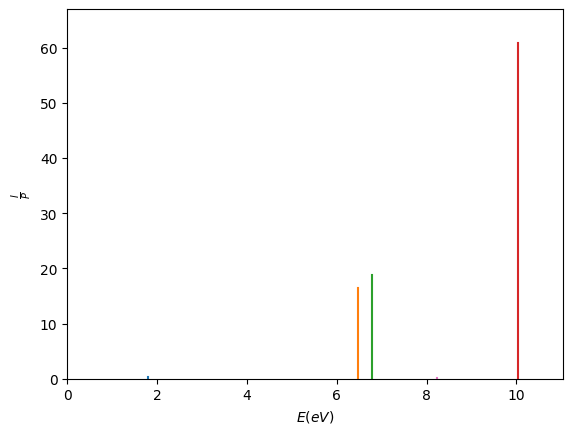

In [ ]:
plt.figure()
Imax = 0
Emax = 0
for t in s.get_transitions():
  a = t.get_einstein_a()
  Ej = 1000*t.get_upper_level().get_energy()
  Ek = 1000*t.get_lower_level().get_energy()
  Ediff = Ej - Ek
  k = Es.index(Ek)
  I = a*x[k]
  if(I > Imax):
    Imax = I
  if(Ediff > Emax):
    Emax = Ediff
  xp = [Ediff, Ediff]
  yp = [0, I]
  plt.plot(xp, yp)
plt.ylim(0, 1.1*Imax)
plt.ylabel(r'$\frac{I}{P}$')
#plt.yscale('log')
plt.xlabel(r'$E (eV)$')
plt.xlim(0, 1.1*Emax)
plt.show()